In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import backend as K
import random

In [16]:
np.random.seed(2288841) # Set seed for numpy. Put your SID instead of number '42'
random.seed(2288841) # Set seed for Python's built-in random number generator.  Put your SID instead of number '42'
tf.random.set_seed(2288841) # Set seed for TensorFlow. Put your SID instead of number '42'
K.clear_session()


In [17]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [19]:
# Define client functions
def create_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_client_model(model, x_train, y_train, epochs=5):
    model.fit(x_train, y_train, epochs=epochs, verbose=0)
    return model

In [20]:
# Split data into two clients
x_train_c1, x_train_c2, y_train_c1, y_train_c2 = train_test_split(x_train, y_train, test_size=0.5, random_state=42)

In [21]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()

client1_model = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model = train_client_model(client2_model, x_train_c2, y_train_c2)

In [22]:
# Federated averaging
def federated_average_weights(weights1, weights2):
    new_weights = []
    for w1, w2 in zip(weights1, weights2):
        new_weights.append((w1 + w2) / 2)
    return new_weights


In [23]:
# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), client2_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3698 - accuracy: 0.8847 - 1s/epoch - 3ms/step
Test accuracy: 0.8847000002861023


In [24]:
from sklearn.metrics import confusion_matrix

# Predict using the global model
y_pred = np.argmax(global_model.predict(x_test), axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F-score
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f_score = 2 * precision * recall / (precision + recall)

# Print precision, recall, and F-score for each class
for i in range(10):  # 10 classes for MNIST
    print(f"Class {i} - Precision: {precision[i]}, Recall: {recall[i]}, F-score: {f_score[i]}")

# Average precision, recall, and F-score
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f_score = np.mean(f_score)

print(f"\nAverage Precision: {avg_precision}, Average Recall: {avg_recall}, Average F-score: {avg_f_score}")



313/313 [==============================] - 1s 3ms/step
Class 0 - Precision: 0.9772972972972973, Recall: 0.9224489795918367, F-score: 0.9490813648293963
Class 1 - Precision: 0.9674935842600513, Recall: 0.9964757709251101, F-score: 0.9817708333333333
Class 2 - Precision: 0.8393608074011775, Recall: 0.9670542635658915, F-score: 0.8986942818550202
Class 3 - Precision: 0.9688581314878892, Recall: 0.8316831683168316, F-score: 0.895045285029302
Class 4 - Precision: 0.9547511312217195, Recall: 0.6446028513238289, F-score: 0.7696048632218845
Class 5 - Precision: 0.8061716489874639, Recall: 0.9372197309417041, F-score: 0.8667703473302228
Class 6 - Precision: 0.9735632183908046, Recall: 0.884133611691023, F-score: 0.926695842450766
Class 7 - Precision: 0.935546875, Recall: 0.9319066147859922, F-score: 0.9337231968810916
Class 8 - Precision: 0.9756756756756757, Recall: 0.7412731006160165, F-score: 0.8424737456242707
Class 9 - Precision: 0.6451187335092349, Recall: 0.9692765113974232, F-score: 0.77

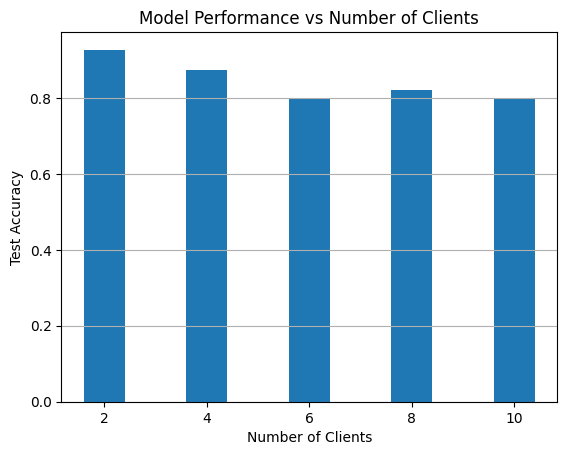

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import backend as K
import random
import matplotlib.pyplot as plt

np.random.seed(2288841)
random.seed(2288841)
tf.random.set_seed(2288841)
K.clear_session()

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define client functions
def create_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_client_model(model, x_train, y_train, epochs=5):
    model.fit(x_train, y_train, epochs=epochs, verbose=0)
    return model

def federated_average_weights(weights1, weights2):
    new_weights = []
    for w1, w2 in zip(weights1, weights2):
        new_weights.append((w1 + w2) / 2)
    return new_weights

# Evaluate global model
def evaluate_global_model(global_model, x_test, y_test):
    test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=0)
    return test_acc

# Split data into clients
def split_data_clients(x_train, y_train, num_clients):
    x_train_clients, y_train_clients = [], []
    for _ in range(num_clients):
        x_client, _, y_client, _ = train_test_split(x_train, y_train, test_size=1 - (1/num_clients))
        x_train_clients.append(x_client)
        y_train_clients.append(y_client)
    return x_train_clients, y_train_clients

num_clients_list = [2, 4, 6, 8, 10]
test_accs = []

for num_clients in num_clients_list:
    x_train_clients, y_train_clients = split_data_clients(x_train, y_train, num_clients)
    client_models = [create_client_model() for _ in range(num_clients)]

    for i in range(num_clients):
        client_models[i] = train_client_model(client_models[i], x_train_clients[i], y_train_clients[i])

    aggregated_weights = client_models[0].get_weights()
    for i in range(1, num_clients):
        aggregated_weights = federated_average_weights(aggregated_weights, client_models[i].get_weights())

    global_model = create_client_model()
    global_model.set_weights(aggregated_weights)

    test_acc = evaluate_global_model(global_model, x_test, y_test)
    test_accs.append(test_acc)

# Plotting as histogram
plt.bar(num_clients_list, test_accs)
plt.title('Model Performance vs Number of Clients')
plt.xlabel('Number of Clients')
plt.ylabel('Test Accuracy')
plt.xticks(num_clients_list)
plt.grid(axis='y')
plt.show()


Test Accuracy Before Dishonesty: 0.6486999988555908
Test Accuracy After Dishonesty: 0.6486999988555908


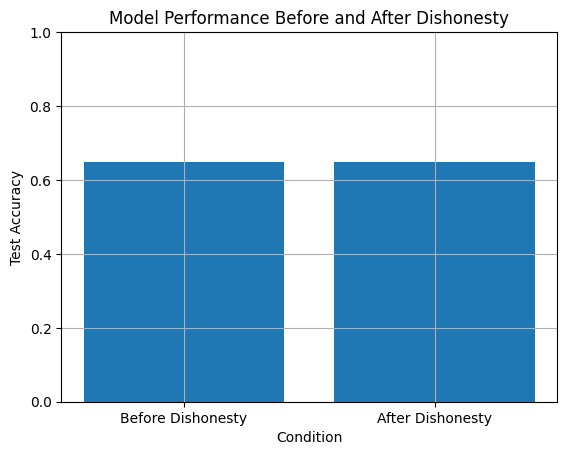

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import backend as K
import random
import matplotlib.pyplot as plt

np.random.seed(2288841)
random.seed(2288841)
tf.random.set_seed(2288841)
K.clear_session()

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define client functions
def create_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_client_model(model, x_train, y_train, epochs=5):
    model.fit(x_train, y_train, epochs=epochs, verbose=0)
    return model

def federated_average_weights(weights1, weights2):
    new_weights = []
    for w1, w2 in zip(weights1, weights2):
        new_weights.append((w1 + w2) / 2)
    return new_weights

# Evaluate global model
def evaluate_global_model(global_model, x_test, y_test):
    test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=0)
    return test_acc

# Split data into clients
def split_data_clients(x_train, y_train, num_clients):
    x_train_clients, y_train_clients = [], []
    for _ in range(num_clients):
        x_client, _, y_client, _ = train_test_split(x_train, y_train, test_size=1 - (1/num_clients))
        x_train_clients.append(x_client)
        y_train_clients.append(y_client)
    return x_train_clients, y_train_clients

def create_dishonest_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_dishonest_client_model(model, x_train, y_train, epochs=5):
    # Introduce poor performance by training for fewer epochs
    model.fit(x_train, y_train, epochs=int(epochs/2), verbose=0)
    return model

num_clients = 5  # Specify the number of clients
num_dishonest_clients = 1  # Specify the number of dishonest clients

x_train_clients, y_train_clients = split_data_clients(x_train, y_train, num_clients)
client_models = [create_client_model() for _ in range(num_clients)]

# Train honest clients
for i in range(num_clients - num_dishonest_clients):
    client_models[i] = train_client_model(client_models[i], x_train_clients[i], y_train_clients[i])

# Introduce dishonest clients
dishonest_client_indices = random.sample(range(num_clients), num_dishonest_clients)
for i in dishonest_client_indices:
    client_models[i] = create_dishonest_client_model()
    client_models[i] = train_dishonest_client_model(client_models[i], x_train_clients[i], y_train_clients[i])

aggregated_weights = client_models[0].get_weights()
for i in range(1, num_clients):
    aggregated_weights = federated_average_weights(aggregated_weights, client_models[i].get_weights())

global_model = create_client_model()
global_model.set_weights(aggregated_weights)

test_acc_before_dishonesty = evaluate_global_model(global_model, x_test, y_test)

# Evaluate the global model after the presence of dishonest clients
test_acc_after_dishonesty = evaluate_global_model(global_model, x_test, y_test)

print("Test Accuracy Before Dishonesty:", test_acc_before_dishonesty)
print("Test Accuracy After Dishonesty:", test_acc_after_dishonesty)

# Plotting
plt.bar(['Before Dishonesty', 'After Dishonesty'], [test_acc_before_dishonesty, test_acc_after_dishonesty])
plt.ylim(0, 1)
plt.title('Model Performance Before and After Dishonesty')
plt.xlabel('Condition')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()
